<a href="https://colab.research.google.com/github/JhonGraciaLo/regresion_simple/blob/main/Copia_de_cobb_douglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Se operativiza la función Cobb-Douglas


$ P_{L,K} = C L^{α}K^{(1-α)}$ \\
$ P = C L^{α}K^{(1-α)}$ \\
$ \ln(P) = \ln(CL^{α}K^{(1-α)})$ \\
$ \ln(P) = \ln(C) + \ln(L^{α})+K^{(1-α)}$ \\
$ \ln(P) = \ln(C)+α\ln(L)+(1-α)\ln(K)$ \\
$ \ln(P) = \ln(C) + α\ln(L)+\ln(K)-\ln(K)$ \\
$ \ln(P)-\ln(K) = \ln(C) + α\ln(L)-\ln(K)$ \\
$ \ln(\frac{P}{K}) = \ln(C)+α\ln(L)-α\ln(K)$ \\
$ \ln(\frac{P}{K}) = α(\ln(L)-\ln(K))+\ln(C)$ \\
$ \ln(\frac{P}{K}) = α\ln(\frac{L}{K})+\ln(C)$ \\
$Y = β_{1}X + β_{0}$ \\

A partir de aquí, la función queda operativa.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import datasets, linear_model


In [3]:
df = pd.read_excel("COBB_DOUGLAS.xlsx")
data = df.values
df.head()

,año,producción,trabajo,capital
0,1950,10,10,10
1,1951,12,11,11
2,1952,13,11,11
3,1953,15,11,12
4,1954,16,12,13


Vemos los encabezados de los datos para tener una referencia de su composición.

In [4]:
data

array([[1950,   10,   10,   10],
       [1951,   12,   11,   11],
       [1952,   13,   11,   11],
       [1953,   15,   11,   12],
       [1954,   16,   12,   13],
       [1955,   18,   13,   12],
       [1956,   14,   12,   14],
       [1957,   19,   14,   15],
       [1958,   19,   15,   16],
       [1959,   20,   16,   14],
       [1960,   21,   14,   17],
       [1961,   23,   17,   18],
       [1962,   25,   18,   19],
       [1963,   26,   19,   20],
       [1964,   30,   20,   21],
       [1965,   32,   21,   22],
       [1966,   31,   22,   25],
       [1967,   30,   25,   24],
       [1968,   35,   24,   23],
       [1969,   36,   23,   26],
       [1970,   38,   26,   28],
       [1971,   40,   28,   29],
       [1972,   41,   29,   30],
       [1973,   42,   30,   30],
       [1974,   43,   30,   31],
       [1975,   44,   31,   30],
       [1976,   46,   30,   32],
       [1977,   47,   32,   33],
       [1978,   49,   33,   31],
       [1979,   50,   31,   32],
       [19

In [5]:
L = data[:,2]
K = data[:,3]
P = data[:,1]
array_L = np.array(L)
array_K = np.array(K)
Array_P = np.array(P)

Logaritmo_PK= np.log(Array_P/array_K)
Logaritmo_LK = np.log(array_L/array_K)

In [6]:
print(Logaritmo_PK.shape)
print(Logaritmo_LK.shape)
print(type(Logaritmo_PK))
print(type(Logaritmo_LK))

(51,)
(51,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
X_1 = Logaritmo_LK.reshape(-1,1)
Y_1 = Logaritmo_PK.reshape(-1,1)

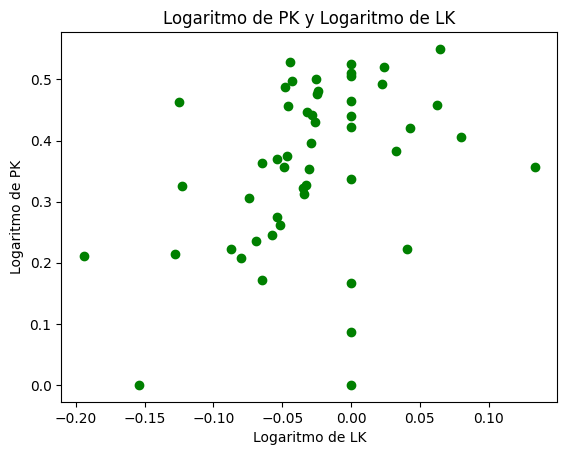

In [8]:
plt.scatter(X_1,Y_1, color="green")
plt.title("Logaritmo de PK y Logaritmo de LK")
plt.xlabel("Logaritmo de LK")
plt.ylabel("Logaritmo de PK")
plt.show()

Los datos tienen una tendencia lineal poco más o menos marcada.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.2)
model=linear_model.LinearRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [11]:
print("Coeficiente de correlación lineal: ")
print(model.coef_)
print()
print("Intercepción con el eje Y:")
print(model.intercept_)
print()
print("Precisión del modelo:")
print(model.score(X_test, y_test))

Coeficiente de correlación lineal: 
[[0.91572356]]

Intercepción con el eje Y:
[0.38231315]

Precisión del modelo:
-0.1102829554186493


In [13]:
import math
constante = math.exp(0.38)
print(f"e^0.38 usando math.exp: {constante}")
constante_1 = np.exp(0.38)
print(f"e^0.38 usando np.exp: {constante_1}")

e^0.38 usando math.exp: 1.4622845894342245
e^0.38 usando np.exp: 1.4622845894342245


El modelo queda así: $ \hat{Y} = 1.40X + 0.38$. El grado de ajuste líneal del modelo es bajo, con un 0.46.\\

Entonces, \\

Según la ecuación líneal. \\
$ \ln(\frac{P}{K}) = α\ln(\frac{L}{K})+\ln(C)$ \\
$Y = β_{1}X + β_{0}$ \\
Podemos decir que $α = \beta_{1}$ y que $\ln(C)= β_{0}$ \\
Los resultados del ejercicio son: \\
$ \hat{Y} = 1.41X + 0.34$ \\
entonces, \\

$ P_{L,K} = CL^{α}K^{(1-α)}$  $\rightarrow \rightarrow \rightarrow  P_{L,K} = 1.46L^{0.91}K^{0.09}$